<a href="https://colab.research.google.com/github/furlancad/Estudo-PMF/blob/main/An%C3%A1lise_de_A%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from datetime import datetime, timedelta

In [65]:
# Definir ação
acao_definida = 'CMIG4'

In [66]:
# Definir periodo de observação
periodo_definido = '5y'

In [67]:
# Definir Benchmark
benchmark_definido = '^BVSP'

In [68]:
acao_definida = acao_definida + '.SA'

In [69]:
acao = yf.download(acao_definida, period=periodo_definido, auto_adjust=True, actions=True)
benchmark = yf.download(benchmark_definido, period=periodo_definido)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [70]:
benchmark.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03
mean,106729.841935,107746.820968,105716.122581,106749.474194,106749.474194,9.508873e+06
std,11306.068501,11123.382987,11434.166982,11291.370792,11291.370792,4.030439e+06
min,63604.000000,67604.000000,61691.000000,63570.000000,63570.000000,0.000000e+00
25%,100001.500000,101022.250000,98973.750000,100006.750000,100006.750000,6.048525e+06
50%,107736.000000,108665.000000,106887.000000,107730.000000,107730.000000,9.778900e+06
75%,115237.250000,116204.250000,114379.500000,115309.500000,115309.500000,1.207170e+07
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,2.602930e+07


In [71]:
acao.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03,1240.000000,1240.000000
mean,7.814029,7.925274,7.695256,7.810852,1.346269e+07,0.003632,0.002787
std,2.338071,2.355253,2.318591,2.336257,6.767439e+06,0.035012,0.056872
min,3.562484,3.781995,3.448156,3.621935,0.000000e+00,0.000000,0.000000
25%,6.071926,6.155983,5.968816,6.066811,8.934240e+06,0.000000,0.000000
50%,7.042190,7.120542,6.958835,7.059687,1.177686e+07,0.000000,0.000000
75%,9.858439,9.996516,9.688167,9.841009,1.638948e+07,0.000000,0.000000
max,12.897855,13.094919,12.819030,12.956974,6.710943e+07,0.597418,1.300000


In [72]:
acao.median()

Open            7.042190e+00
High            7.120542e+00
Low             6.958835e+00
Close           7.059687e+00
Volume          1.177686e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
dtype: float64

In [73]:
acao.var()

Open            5.466576e+00
High            5.547216e+00
Low             5.375862e+00
Close           5.458095e+00
Volume          4.579823e+13
Dividends       1.225863e-03
Stock Splits    3.234445e-03
dtype: float64

In [74]:
acao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-10-29 to 2023-10-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1240 non-null   float64
 1   High          1240 non-null   float64
 2   Low           1240 non-null   float64
 3   Close         1240 non-null   float64
 4   Volume        1240 non-null   int64  
 5   Dividends     1240 non-null   float64
 6   Stock Splits  1240 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 77.5 KB


In [75]:
acao.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [76]:
acao.index

DatetimeIndex(['2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08',
               '2018-11-09', '2018-11-12',
               ...
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27'],
              dtype='datetime64[ns]', name='Date', length=1240, freq=None)

In [77]:
acao.index = acao.index.tz_localize('UTC')
acao.index

DatetimeIndex(['2018-10-29 00:00:00+00:00', '2018-10-30 00:00:00+00:00',
               '2018-10-31 00:00:00+00:00', '2018-11-01 00:00:00+00:00',
               '2018-11-05 00:00:00+00:00', '2018-11-06 00:00:00+00:00',
               '2018-11-07 00:00:00+00:00', '2018-11-08 00:00:00+00:00',
               '2018-11-09 00:00:00+00:00', '2018-11-12 00:00:00+00:00',
               ...
               '2023-10-16 00:00:00+00:00', '2023-10-17 00:00:00+00:00',
               '2023-10-18 00:00:00+00:00', '2023-10-19 00:00:00+00:00',
               '2023-10-20 00:00:00+00:00', '2023-10-23 00:00:00+00:00',
               '2023-10-24 00:00:00+00:00', '2023-10-25 00:00:00+00:00',
               '2023-10-26 00:00:00+00:00', '2023-10-27 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1240, freq=None)

In [78]:
acao.index = acao.index.tz_convert('America/Sao_Paulo')
acao.index

DatetimeIndex(['2018-10-28 21:00:00-03:00', '2018-10-29 21:00:00-03:00',
               '2018-10-30 21:00:00-03:00', '2018-10-31 21:00:00-03:00',
               '2018-11-04 22:00:00-02:00', '2018-11-05 22:00:00-02:00',
               '2018-11-06 22:00:00-02:00', '2018-11-07 22:00:00-02:00',
               '2018-11-08 22:00:00-02:00', '2018-11-11 22:00:00-02:00',
               ...
               '2023-10-15 21:00:00-03:00', '2023-10-16 21:00:00-03:00',
               '2023-10-17 21:00:00-03:00', '2023-10-18 21:00:00-03:00',
               '2023-10-19 21:00:00-03:00', '2023-10-22 21:00:00-03:00',
               '2023-10-23 21:00:00-03:00', '2023-10-24 21:00:00-03:00',
               '2023-10-25 21:00:00-03:00', '2023-10-26 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=1240, freq=None)

In [79]:
acao.shape

(1240, 7)

In [80]:
acao.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

<Axes: >

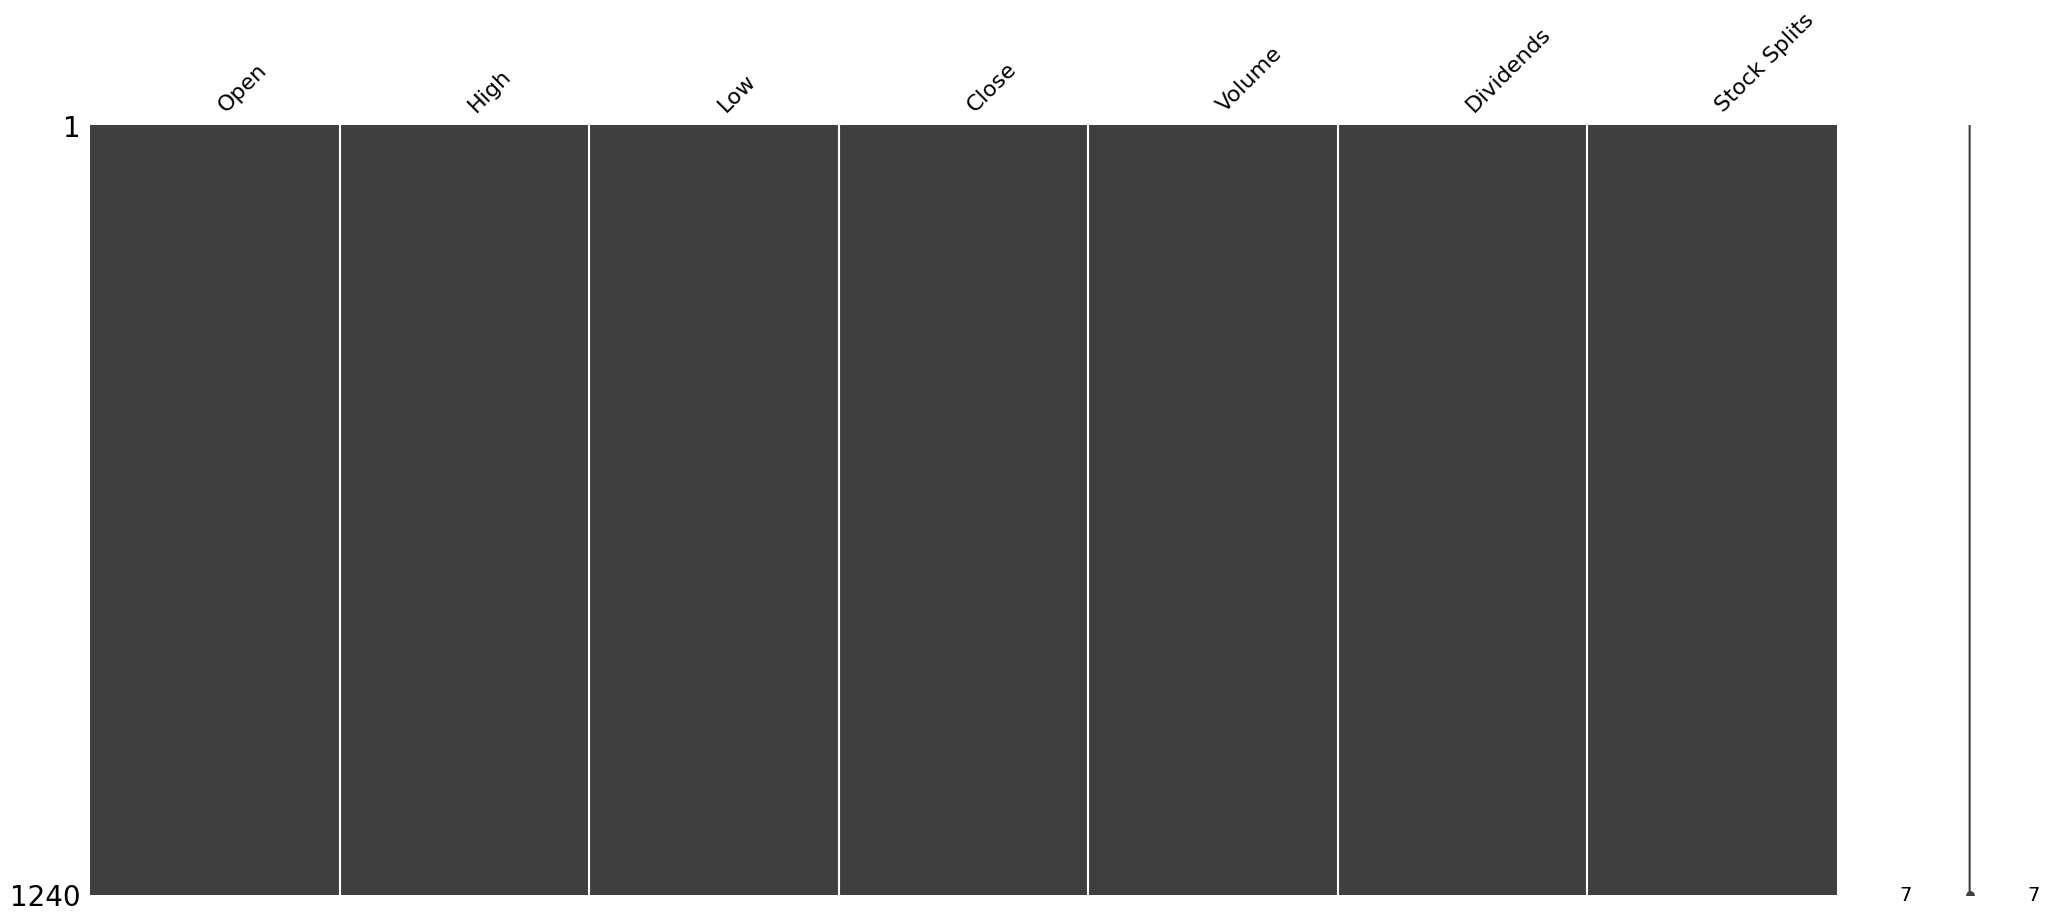

In [81]:
msno.matrix(acao)

<Axes: >

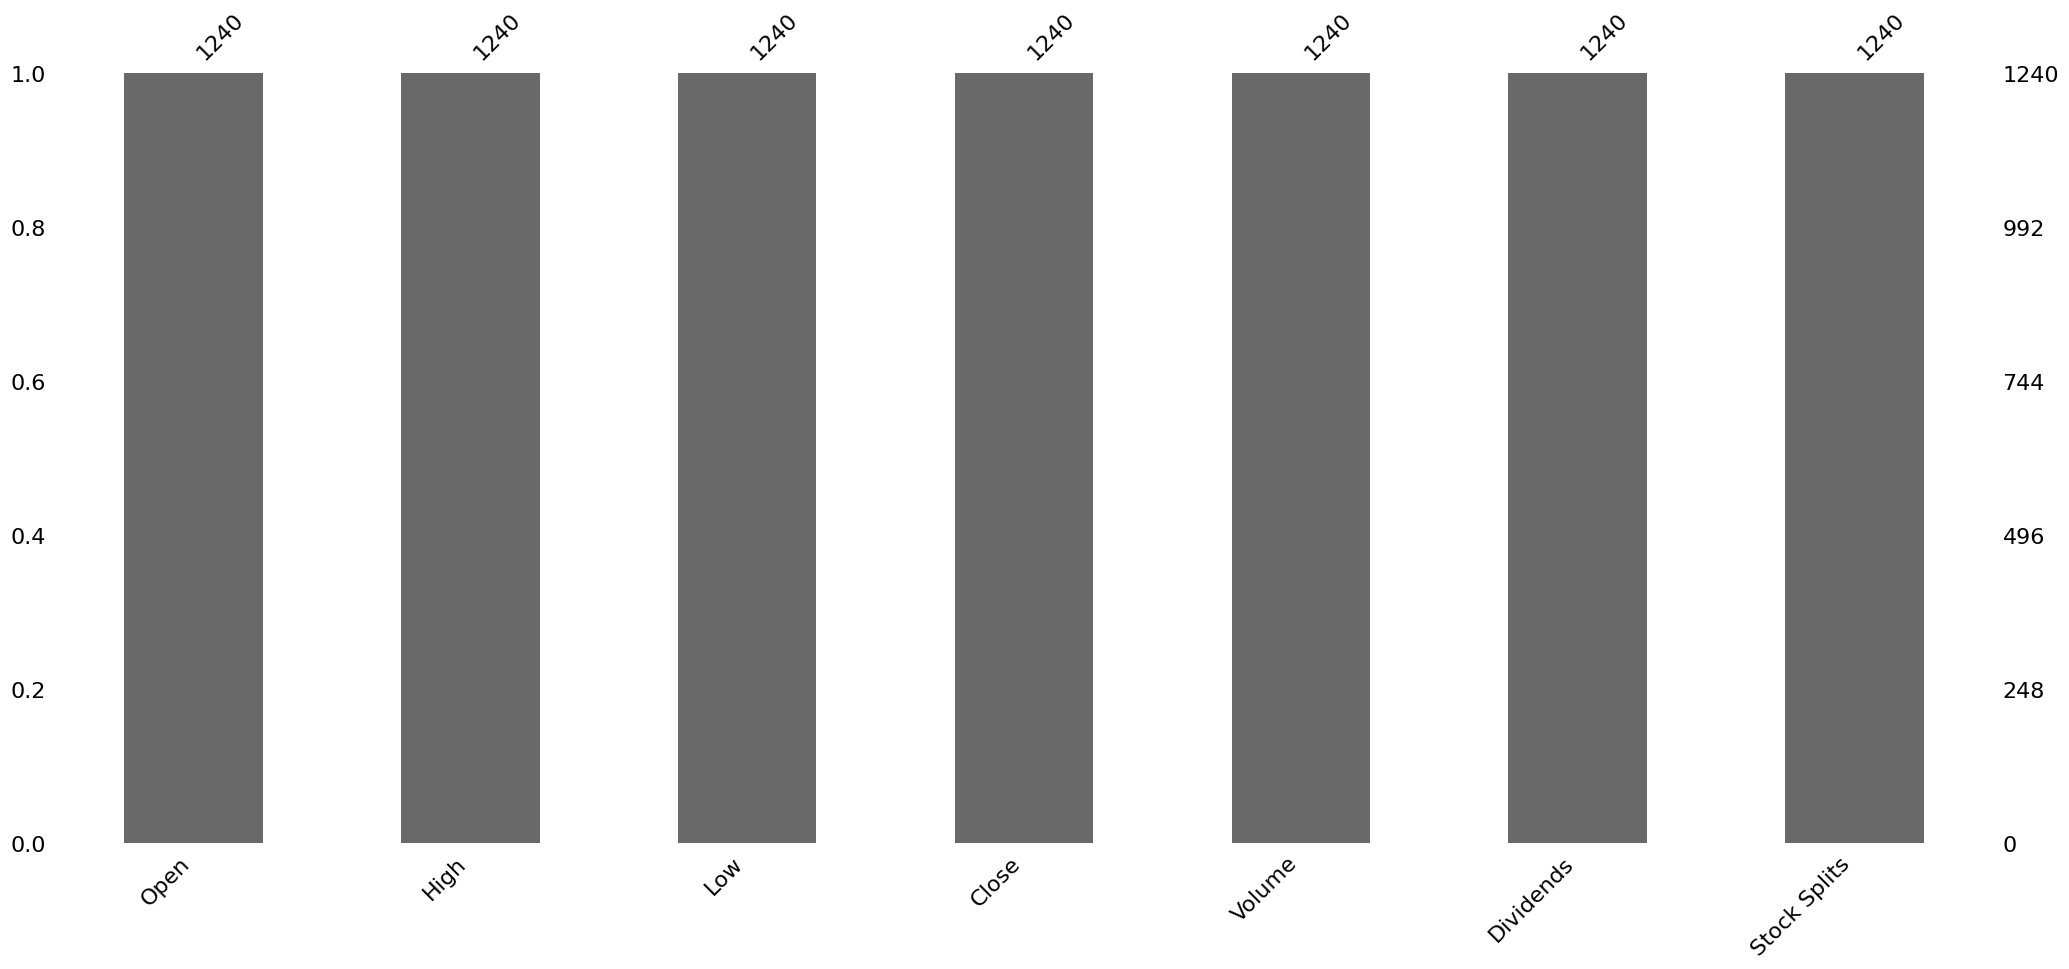

In [82]:
msno.bar(acao)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

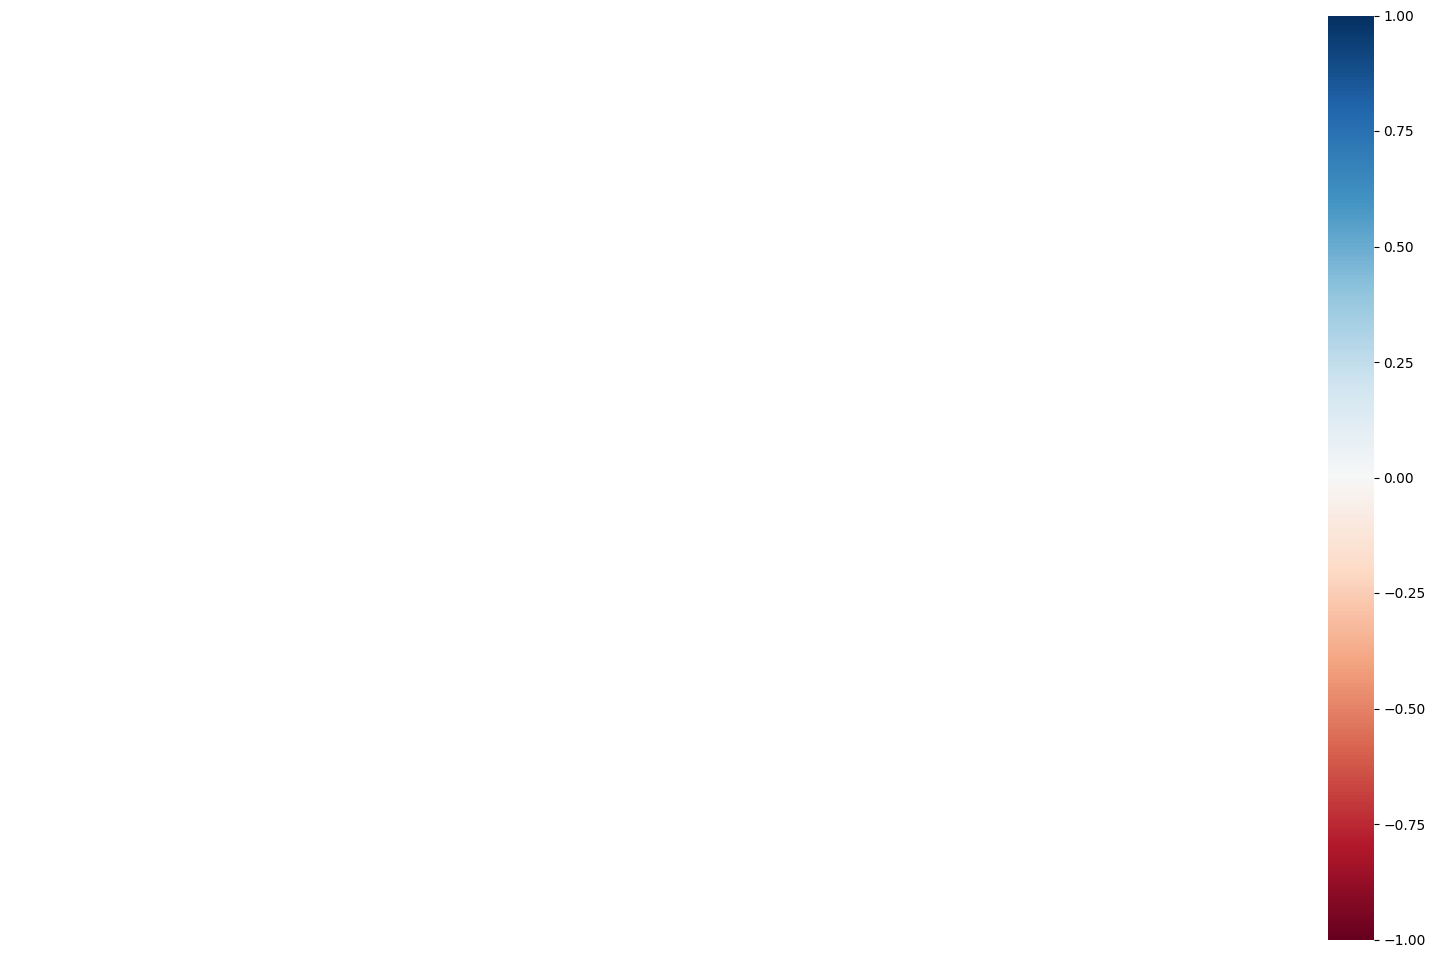

In [83]:
msno.heatmap(acao)

In [84]:
acao = acao.asfreq('D')
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-28 21:00:00-03:00,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-29 21:00:00-03:00,4.892268,4.926630,4.664620,4.836430,50919894.0,0.0,0.0
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0
2018-10-31 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-10-22 21:00:00-03:00,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-23 21:00:00-03:00,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-24 21:00:00-03:00,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [85]:
acao.fillna(method='ffill', inplace=True)
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-28 21:00:00-03:00,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0
2018-10-29 21:00:00-03:00,4.892268,4.926630,4.664620,4.836430,50919894.0,0.0,0.0
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0
2018-10-31 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
2018-11-01 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-22 21:00:00-03:00,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0
2023-10-23 21:00:00-03:00,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0
2023-10-24 21:00:00-03:00,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0


In [125]:
acao.sort_index(ascending=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2023-10-26 21:00:00-03:00,12.210000,12.270000,11.890000,11.930000,6954900.0,0.0,0.0,-1.891444
2023-10-25 21:00:00-03:00,11.950000,12.180000,11.900000,12.160000,7682800.0,0.0,0.0,2.616029
2023-10-24 21:00:00-03:00,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0,-0.670578
2023-10-23 21:00:00-03:00,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0,0.167930
2023-10-22 21:00:00-03:00,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0,0.846735
...,...,...,...,...,...,...,...,...
2018-11-01 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,0.000000
2018-10-31 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,-0.362647
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0,-2.042646


In [127]:
acao.sort_values('Dividends', ascending=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2022-05-01 21:00:00-03:00,9.488713,9.567859,9.321628,9.471126,29697200.0,0.597418,1.300000,0.774797
2022-03-28 21:00:00-03:00,9.712224,9.801914,9.308616,9.379086,11226280.0,0.570889,0.000000,4.887241
2021-12-21 21:00:00-03:00,8.193854,8.193854,7.944449,8.005280,9879220.0,0.434116,0.000000,-0.646591
2021-05-02 21:00:00-03:00,7.112197,7.240555,6.942998,7.059687,19667830.0,0.422017,1.114969,1.986813
2019-05-05 21:00:00-03:00,6.283180,6.305588,6.171140,6.278698,10309564.0,0.298724,0.000000,-0.065642
...,...,...,...,...,...,...,...,...
2020-06-23 21:00:00-03:00,5.190527,5.213393,4.980162,5.048759,12137509.0,0.000000,0.000000,-3.157891
2020-06-22 21:00:00-03:00,5.359734,5.391745,5.181380,5.213393,8852851.0,0.000000,0.000000,-1.554389
2020-06-21 21:00:00-03:00,5.213392,5.437477,5.135648,5.295709,13730793.0,0.000000,0.000000,1.757452


In [128]:
acao.nlargest(5, 'Dividends')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2022-05-01 21:00:00-03:00,9.488713,9.567859,9.321628,9.471126,29697200.0,0.597418,1.300000,0.774797
2022-03-28 21:00:00-03:00,9.712224,9.801914,9.308616,9.379086,11226280.0,0.570889,0.000000,4.887241
2021-12-21 21:00:00-03:00,8.193854,8.193854,7.944449,8.005280,9879220.0,0.434116,0.000000,-0.646591
2021-05-02 21:00:00-03:00,7.112197,7.240555,6.942998,7.059687,19667830.0,0.422017,1.114969,1.986813
2019-05-05 21:00:00-03:00,6.283180,6.305588,6.171140,6.278698,10309564.0,0.298724,0.000000,-0.065642


In [129]:
acao.nsmallest(5, 'Volume')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2022-09-25 21:00:00-03:00,10.766623,10.766623,10.766623,10.766623,0.0,0.21428,0.0,1.843152
2022-12-25 21:00:00-03:00,10.289823,10.317558,10.077185,10.132656,2067400.0,0.00000,0.0,-1.350115
2023-09-03 21:00:00-03:00,12.296809,12.365782,12.188424,12.237690,2655500.0,0.00000,0.0,-0.321024
2022-09-04 21:00:00-03:00,10.777131,10.893206,10.714629,10.812846,2761500.0,0.00000,0.0,0.000000
2023-07-27 21:00:00-03:00,12.415048,12.434754,12.286956,12.415048,2980900.0,0.00000,0.0,0.638972


In [86]:
acao['Rentabilidade'] = acao['Close'].pct_change()*100
acao

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-28 21:00:00-03:00,4.905153,4.969581,4.814953,4.892267,67109427.0,0.0,0.0,NaN
2018-10-29 21:00:00-03:00,4.892268,4.926630,4.664620,4.836430,50919894.0,0.0,0.0,-1.141335
2018-10-30 21:00:00-03:00,4.857906,4.892267,4.707572,4.737639,26771033.0,0.0,0.0,-2.042646
2018-10-31 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,-0.362647
2018-11-01 21:00:00-03:00,4.767705,4.866496,4.703276,4.720458,33154581.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2023-10-22 21:00:00-03:00,11.810000,11.990000,11.750000,11.910000,6187900.0,0.0,0.0,0.846735
2023-10-23 21:00:00-03:00,12.040000,12.040000,11.850000,11.930000,4901000.0,0.0,0.0,0.167930
2023-10-24 21:00:00-03:00,11.930000,11.990000,11.850000,11.850000,5503800.0,0.0,0.0,-0.670578


In [87]:
moving_average_50 = acao.rolling(50).mean()
moving_average_50

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Rentabilidade
Date,,,,,,,,
2018-10-28 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-29 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-10-22 21:00:00-03:00,12.330695,12.440752,12.174561,12.287971,9181186.0,0.003799,0.0,-0.055120
2023-10-23 21:00:00-03:00,12.325559,12.434237,12.167793,12.281817,9226096.0,0.003799,0.0,-0.045341
2023-10-24 21:00:00-03:00,12.320193,12.427706,12.163192,12.277019,9219800.0,0.003799,0.0,-0.034598


In [88]:
moving_average_200 = acao.iloc[:,0:4].rolling(200).mean()
moving_average_200

,Open,High,Low,Close
Date,,,,
2018-10-28 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-10-29 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-10-30 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-10-31 21:00:00-03:00,NaN,NaN,NaN,NaN
2018-11-01 21:00:00-03:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-10-22 21:00:00-03:00,12.118529,12.244793,11.970263,12.108274
2023-10-23 21:00:00-03:00,12.122659,12.248058,11.973587,12.111710
2023-10-24 21:00:00-03:00,12.126239,12.251072,11.976912,12.114746


In [89]:
benchmark = benchmark.asfreq('D')
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0


In [90]:
benchmark.fillna(method='ffill', inplace=True)
benchmark

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
2018-11-02,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0


In [91]:
benchmark['Rentabilidade'] = benchmark['Close'].pct_change()*100
benchmark

,Open,High,Low,Close,Adj Close,Volume,Rentabilidade
Date,,,,,,,
2018-10-29,85728.0,88377.0,82783.0,83797.0,83797.0,7733900.0,NaN
2018-10-30,83802.0,86990.0,83802.0,86886.0,86886.0,6556900.0,3.686289
2018-10-31,86889.0,88028.0,86213.0,87424.0,87424.0,5889800.0,0.619202
2018-11-01,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0,1.138131
2018-11-02,87428.0,89017.0,87094.0,88419.0,88419.0,5878400.0,0.000000
...,...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800.0,-0.326985
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800.0,0.866250
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500.0,-0.819254


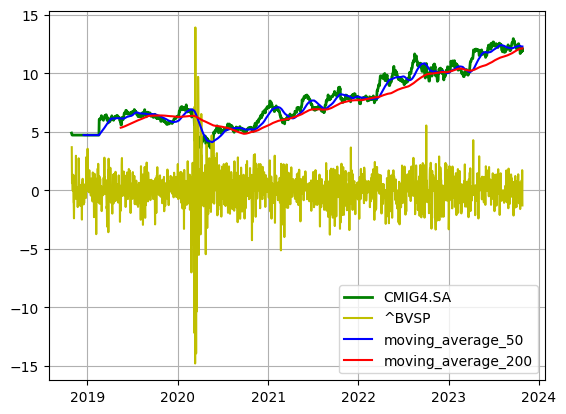

In [92]:
plt.plot(acao['Close'].loc['2016-01-01':], 'g-', label='line 1', linewidth=2)
plt.plot(benchmark['Rentabilidade'].loc['2016-01-01':], 'y-', label='line 2',)
plt.plot(acao.Close.rolling(50).mean().loc['2016-01-01':], 'b-', label='line 2',)
plt.plot(acao.Close.rolling(200).mean().loc['2016-01-01':], 'r-', label='line 2',)

plt.legend([acao_definida, benchmark_definido, "moving_average_50", 'moving_average_200'])
plt.grid(True)

# Salve o gráfico como uma imagem
fig = plt.gcf()
fig.savefig("image.png")

In [93]:
acao_weekly = acao.resample('7D').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_weekly

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-28 00:00:00-03:00,4.905153,4.969581,4.664620,4.720458,277418678.0
2018-11-04 01:00:00-02:00,4.767705,4.866496,4.703276,4.720458,232082067.0
2018-11-11 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,232082067.0
2018-11-18 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,232082067.0
2018-11-25 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,232082067.0
...,...,...,...,...,...
2023-09-24 00:00:00-03:00,12.641671,12.907708,12.190000,12.410000,57851700.0
2023-10-01 00:00:00-03:00,12.400000,12.510000,11.910000,12.120000,45675200.0
2023-10-08 00:00:00-03:00,12.080000,12.730000,12.060000,12.150000,57630900.0


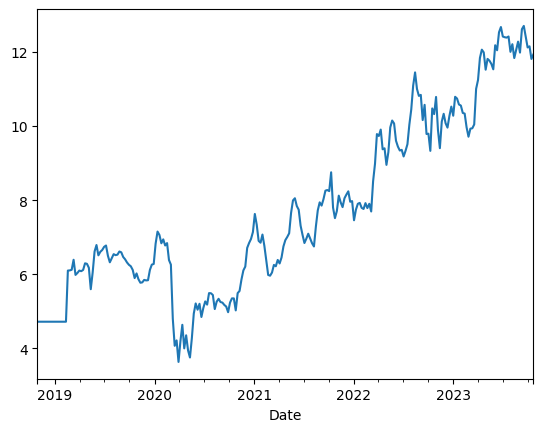

In [94]:
acao_weekly.Close.plot();

In [95]:
acao_month = acao.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_month

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-31 00:00:00-03:00,4.905153,4.969581,4.664620,4.720458,1.779549e+08
2018-11-30 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,9.946374e+08
2018-12-31 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,1.027792e+09
2019-01-31 00:00:00-02:00,4.767705,4.866496,4.703276,4.720458,1.027792e+09
2019-02-28 00:00:00-03:00,4.767705,6.504262,4.703276,6.104801,7.306176e+08
...,...,...,...,...,...
2023-06-30 00:00:00-03:00,11.490979,12.750056,11.423042,12.671230,3.771259e+08
2023-07-31 00:00:00-03:00,12.503726,12.759910,12.050478,12.444607,2.319282e+08
2023-08-31 00:00:00-03:00,12.434753,12.710643,11.607084,12.277102,3.107415e+08


In [96]:
type(acao_month.Close)

pandas.core.series.Series

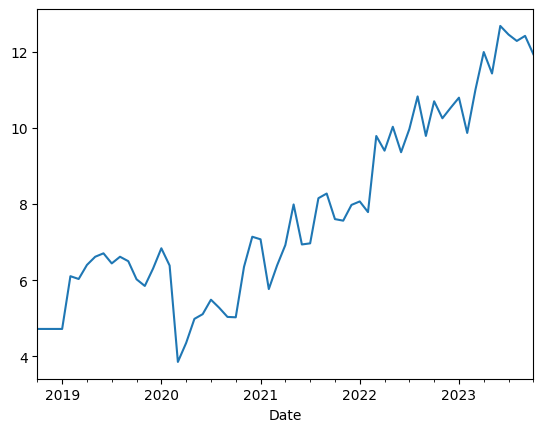

In [97]:
acao_month.Close.plot();

In [98]:
acao_trimestre = acao.resample('Q').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})
acao_trimestre

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31 00:00:00-02:00,4.905153,4.969581,4.664620,4.720458,2.200384e+09
2019-03-31 00:00:00-03:00,4.767705,6.504263,4.703276,6.030989,2.212881e+09
2019-06-30 00:00:00-03:00,6.074408,7.054013,5.575090,6.704449,1.396454e+09
2019-09-30 00:00:00-03:00,6.708931,6.986788,6.112880,6.498297,1.293471e+09
2019-12-31 00:00:00-03:00,6.444517,6.453479,5.467532,6.306375,1.043962e+09
2020-03-31 00:00:00-03:00,6.320096,7.413078,3.448156,3.855166,1.554224e+09
2020-06-30 00:00:00-03:00,3.855166,5.592964,3.466448,5.108209,1.968307e+09
2020-09-30 00:00:00-03:00,5.167660,5.794183,4.876436,5.035869,1.443993e+09
2020-12-31 00:00:00-03:00,4.986834,7.193398,4.913281,7.139459,1.317386e+09


In [99]:
type(acao_trimestre.Close)

pandas.core.series.Series

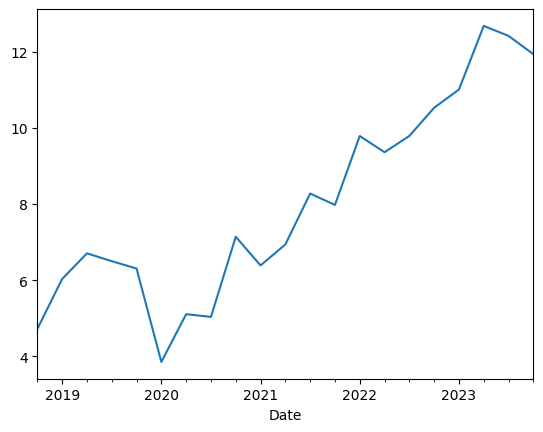

In [107]:
acao_trimestre.Close.plot();

In [115]:
data_atual = '04-01-2022'

In [116]:
datetime.strptime(data_atual, '%d-%m-%Y')

datetime.datetime(2022, 1, 4, 0, 0)

In [117]:
data_hora_atual = datetime.now()

In [120]:
data_hora_atual

datetime.datetime(2023, 10, 30, 1, 54, 37, 674517)

In [119]:
datetime.strftime(data_hora_atual, '%d-%m-%Y')

'30-10-2023'

In [121]:
data_200_dias_atras = datetime.now() - timedelta(days=200)
data_200_dias_atras

datetime.datetime(2023, 4, 13, 1, 57, 21, 59000)